In [1]:
import matplotlib
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as ss
from matplotlib import style
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 9)
import pandas as pd

from sklearn.decomposition import RandomizedPCA, PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn

In [2]:
df_expr = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/expression_matrix.txt', sep='\t', index_col='genes')

df_expr.shape

df_expr = df_expr.drop_duplicates()

df_expr.shape

(45534, 82)

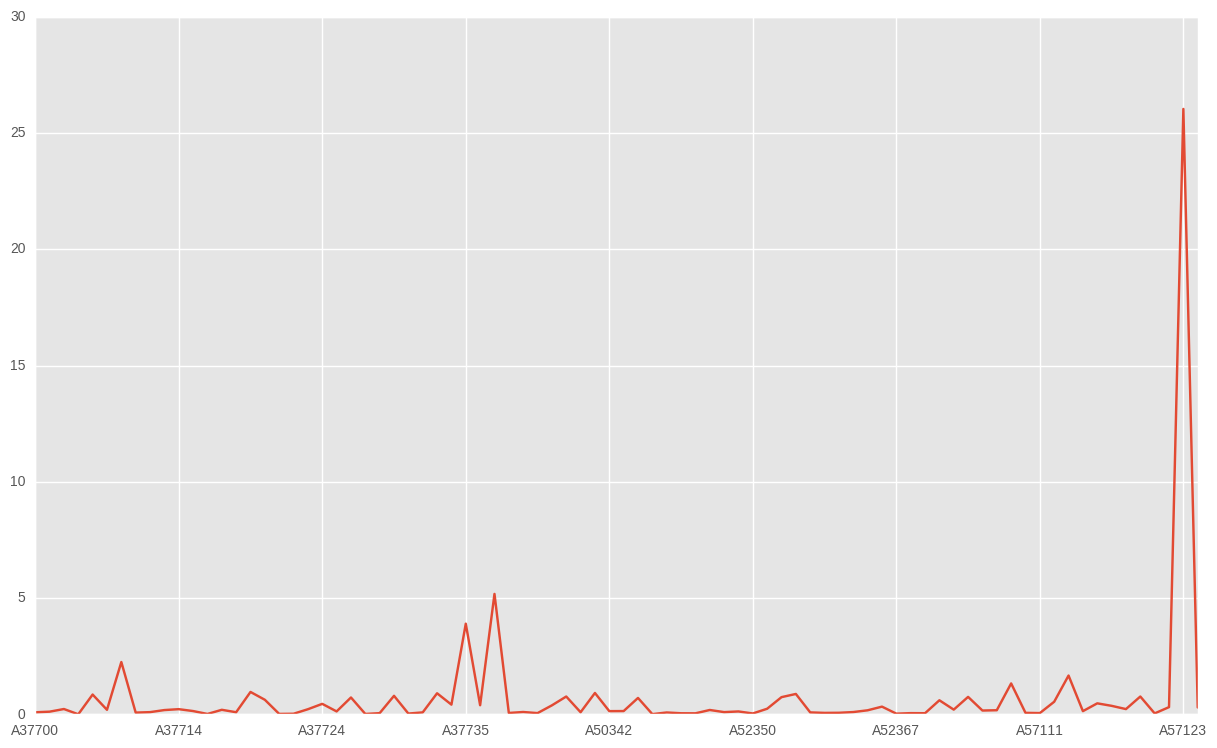

In [12]:
df_expr.loc['TERT'].plot()

In [31]:
df_expr = df_expr.T

# df_expr.columns.value_counts().to_frame(name='count').query('count >1').index.values


dup_gene_names = df_expr.columns.value_counts().to_frame(name='count').query('count > 1').index.values

dup_gene_names.shape

df_expr.shape

df_expr.drop(dup_gene_names, axis=1, inplace=True)

df_expr.shape

df_expr.head(2)

df_expr = df_expr.reset_index().rename(columns={'index': 'lib'})

df_expr.head(2)

df_expr.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/expression_matrix.dedup.txt', index=False)

In [14]:
df_merge = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/expression_matrix.dedup.merged.txt')

/home/szong/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (42588) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
df_merge[['TERT']].sort_values('TERT')

,TERT
3,0.0000
43,0.0064
12,0.0138
23,0.0140
17,0.0157
18,0.0226
60,0.0266
26,0.0310
50,0.0349
78,0.0377


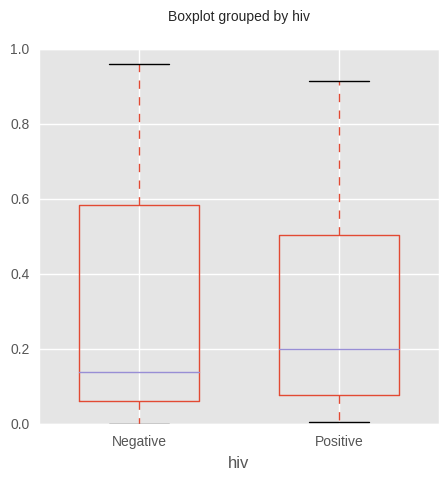

In [42]:
# ax = plt.axes()
# for i in ['Positive', 'Negative']:
#     col = 'blue' if i == 'Negative' else 'red'
#     _df = df_merge.query('hiv == "{0}"'.format(i))
#     ax.scatter(_df['x'].values, _df['y'].values, color=col)
df=df_merge
fig = plt.figure()
group_col = 'hiv'
value_col = 'TERT'
ax = df.boxplot(column=value_col, by=group_col, showfliers=False, widths=(0.6,0.6), figsize=(5,5))
plt.title('') # this removes the column as subtitle of the plot
fig =ax.get_figure()

# # overlay actuall data points
# categories = df[group_col].unique().tolist()
# for category in categories:
#     y = df[value_col][df[group_col]==category]
# #     i = categories.index(category) + 1
# #     print category
#     if category == 'Positive':
#         i = 2
#     elif category == 'Negative':
#         i = 1
#     # add jitter and specify maker facecolor and edgecolor
#     x = np.random.normal(i, 0.1, size=len(y))
#     plt.plot(x, y, 'o', markerfacecolor='gray',markeredgecolor='blue', markersize=5, alpha=0.8)
